
# Text Classification using a Neural Network and Model Deployment using Gradio

In [15]:
from datasets import load_dataset
import tensorflow as tf 
import numpy as np

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

In [16]:
data = load_dataset('masakhane/masakhanews', 'swa')

Found cached dataset masakhanews (/home/koechian/.cache/huggingface/datasets/masakhane___masakhanews/swa/1.0.0/c60334474cec1d13c0c3018e138cd8b60bc6443fa5e25258d65d990b2498403f)


  0%|          | 0/3 [00:00<?, ?it/s]

In [17]:
texts = data['train']['text'] + data['test']['text'] + data['validation']['text']
labels = data['train']['label'] + data['test']['label'] + data['validation']['label']

print(len(labels))
print(len(texts))
print(len(set(labels)))

2371
2371
7


Creating our own train test algo 

In [18]:
training_portion = 0.8

train_size = int(len(texts) * training_portion)
print(train_size)

1896


In [19]:
train_texts = texts[0:train_size]
train_labels = labels[0:train_size]

val_texts = texts[train_size:]
val_labels = labels[train_size:]


print(len(train_texts))
print(len(train_texts))
print(len(val_texts))
print(len(val_labels))

1896
1896
475
475


In [20]:
train_labels = np.array(train_labels)
val_labels = np.array(val_labels)

type(val_labels)

numpy.ndarray

In [21]:
vocab_size = 10000

# UNK = unknown, MASK = missing/masked out sentence, ? = token, start = start of sentence
tokeniser  = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokeniser.fit_on_texts(train_texts)
word_index = tokeniser.word_index

In [22]:
max_len = 200
padding_type = 'post'
trunc_type = 'post'

In [23]:
train_seq = tokeniser.texts_to_sequences(train_texts)
train_seq = pad_sequences(train_seq, maxlen=max_len,padding=padding_type, truncating=trunc_type)

val_seq = tokeniser.texts_to_sequences(val_texts)
val_seq = pad_sequences(val_seq, maxlen=max_len,padding=padding_type, truncating=trunc_type)

print(train_seq.shape)
print(val_seq.shape)

(1896, 200)
(475, 200)


In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(20000,64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(7,activation='softmax')
])

model.summary()

2023-07-11 16:11:13.496848: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-11 16:11:13.498245: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-11 16:11:13.499322: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          1280000   
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 7)                 903       
                                                                 
Total params: 1,314,055
Trainable params: 1,314,055
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam', 
    metrics =  ['accuracy']

)

In [26]:
history = model.fit(
    train_seq,
    train_labels,
    epochs=100,
    validation_data=(val_seq,val_labels),
    verbose=1
)

Epoch 1/100


2023-07-11 16:11:19.648080: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-11 16:11:19.649756: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-11 16:11:19.651327: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

60/60 [==============================] - ETA: 0s - loss: 1.8308 - accuracy: 0.2890

2023-07-11 16:11:27.930902: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-11 16:11:27.932661: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-11 16:11:27.935585: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

60/60 [==============================] - 9s 99ms/step - loss: 1.8308 - accuracy: 0.2890 - val_loss: 1.4856 - val_accuracy: 0.4737
Epoch 2/100
60/60 [==============================] - 5s 90ms/step - loss: 1.4044 - accuracy: 0.4504 - val_loss: 1.2407 - val_accuracy: 0.5095
Epoch 3/100
60/60 [==============================] - 7s 114ms/step - loss: 1.0254 - accuracy: 0.6118 - val_loss: 1.0141 - val_accuracy: 0.6547
Epoch 4/100
60/60 [==============================] - 7s 117ms/step - loss: 0.5995 - accuracy: 0.7801 - val_loss: 0.9361 - val_accuracy: 0.6484
Epoch 5/100
60/60 [==============================] - 9s 149ms/step - loss: 0.3257 - accuracy: 0.8950 - val_loss: 1.3461 - val_accuracy: 0.6211
Epoch 6/100
60/60 [==============================] - 8s 131ms/step - loss: 0.1752 - accuracy: 0.9494 - val_loss: 1.2145 - val_accuracy: 0.6189
Epoch 7/100
60/60 [==============================] - 8s 129ms/step - loss: 0.1002 - accuracy: 0.9752 - val_loss: 1.3283 - val_accuracy: 0.6421
Epoch 8/100
6

In [27]:
def plot(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string,'val_' + string])
    plt.show()

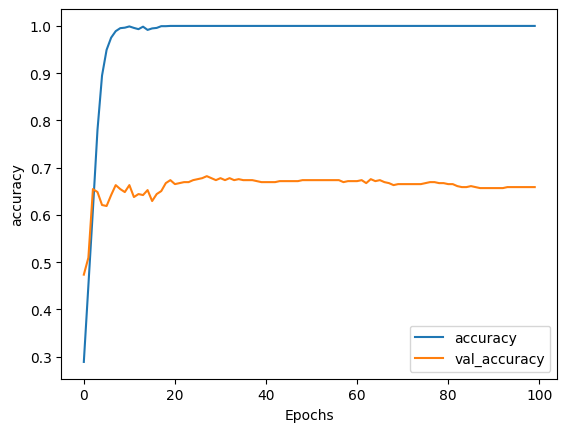

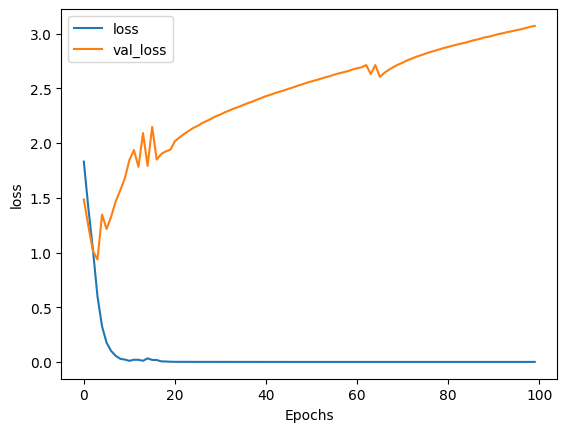

In [28]:
plot(history, 'accuracy')
plot(history, 'loss')

In [30]:
def predict(text):
    seq = tokeniser.texts_to_sequences([text])
    seq = pad_sequences(seq, maxlen=max_len,padding='post', truncating='post')
    prediction = model.predict(seq)

    pred = np.argmax(prediction)

    labels = ["business", "entertainment", "health", "politics", "religion", "sports", "technology"]
    return labels[pred]

Deployment

In [31]:
import pickle

with open('tok.pickle', 'wb') as handle:
    pickle.dump(tokeniser, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [32]:
model.save('model.h5')

In [36]:
import gradio as gr

def clf(text):
    pred = predict(str(text))
    return pred

iface = gr.Interface(
    fn = clf,
    inputs = gr.inputs.Textbox(lines=2,placeholder='Enter Headline'),
    outputs = gr.outputs.Textbox(label='Category') 
)

iface.launch()

# clf("Hello World")


Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.
